In [ ]:
!pip install tensorflow
!pip install tensorflow xgboost

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load the dataset
df = pd.read_csv('/content/economic_updated_data.csv')

# Data exploration

In [ ]:
# Display basic information
df.head()

,country_name,country_iso_code,year,population,yearly_percentage_change,median_age,fertility_rate,density,population_global_rank,happiness_index,...,pct,male_percentage,female_percentage,politics,trade_balance,ease_of_doing_business,interest_rates,taxes,natural_resources,economic_category
0,Afghanistan,AF / AFG,2024,42647492,2.88,17.1,4.76,65,36,2.0,...,NaN,0.5049,0.4951,2.0,12.42 Billion dollars,173 out of 190 countries,0.1494,0.20,$3 trillion of US dollars,3 \10
1,Albania,AL / ALB,2024,2791765,-0.71,36.7,1.34,102,143,5.0,...,NaN,0.4980,0.5057,5.0,20.7 Billion dollars,82 out of 190 countries,0.0275,0.15,0.014426,6 \10
2,Algeria,DZ / DZA,2024,46814308,1.41,28.4,2.72,20,33,5.0,...,NaN,0.5040,0.4910,3.0,982 Billion dollars,157 out of 190 countries,0.0800,0.19,0.226,5 \10
3,Angola,AO / AGO,2024,37885849,3.09,16.5,5.05,30,41,1.0,...,NaN,0.4940,0.5052,2.0,0,177 out of 190 countries,0.1900,0.25,0.2997,4 \10
4,Argentina,AR / ARG,2024,45696159,0.35,32.5,1.50,17,35,6.0,...,NaN,0.4963,0.5200,5.0,2640.00 USD Million,126 out of 190 countries,0.2900,0.25,0.139,5 \10


In [ ]:
df.shape

(131, 24)

In [ ]:
df.isnull().sum()

,0
country_name,0
country_iso_code,0
year,0
population,0
yearly_percentage_change,0
median_age,0
fertility_rate,0
density,0
population_global_rank,0
happiness_index,0


In [ ]:
df.info()


df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country_name              131 non-null    object 
 1   country_iso_code          131 non-null    object 
 2   year                      131 non-null    int64  
 3   population                131 non-null    int64  
 4   yearly_percentage_change  131 non-null    float64
 5   median_age                131 non-null    float64
 6   fertility_rate            131 non-null    float64
 7   density                   131 non-null    int64  
 8   population_global_rank    131 non-null    int64  
 9   happiness_index           131 non-null    float64
 10  human_development_index   131 non-null    object 
 11  gdp                       131 non-null    int64  
 12  currency                  131 non-null    object 
 13  ppp                       131 non-null    object 
 14  pct       

,year,population,yearly_percentage_change,median_age,fertility_rate,density,population_global_rank,happiness_index,gdp,pct,male_percentage,female_percentage,politics,interest_rates,taxes
count,131.0,1.310000e+02,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,0.0,131.000000,131.000000,29.000000,131.000000,131.000000
mean,2024.0,4.968113e+07,1.160076,29.723664,2.508244,153.564885,91.419847,4.319838,25203.748092,NaN,0.503801,0.495573,4.586207,0.091377,0.219618
std,0.0,1.788007e+08,1.171193,9.598829,1.219498,230.879659,54.836674,2.387509,26574.712794,NaN,0.025879,0.025726,1.524028,0.377462,0.093038
min,2024.0,1.041750e+05,-1.900000,15.400000,0.990000,2.000000,1.000000,0.000000,0.000000,NaN,0.465000,0.245000,2.000000,0.001500,0.000000
25%,2024.0,3.032546e+06,0.315000,20.550000,1.485000,29.000000,41.500000,3.000000,5179.000000,NaN,0.495500,0.492000,4.000000,0.038900,0.150000
50%,2024.0,1.060700e+07,1.100000,28.800000,2.110000,78.000000,90.000000,5.000000,16062.000000,NaN,0.504000,0.495000,5.000000,0.045100,0.240000
75%,2024.0,3.787304e+07,1.980000,39.200000,3.520000,169.000000,138.500000,6.000000,40401.500000,NaN,0.507000,0.503300,5.000000,0.066200,0.300000
max,2024.0,1.450936e+09,5.070000,49.400000,6.030000,1759.000000,197.000000,8.000000,139106.000000,NaN,0.755000,0.535000,8.000000,4.350000,0.400000


# Data preprocessing

In [ ]:
# Convert 'economic_category' to numeric
df['economic_category'] = df['economic_category'].astype(str).apply(lambda x: int(x.split('\\')[0]))

In [ ]:
# Clean 'trade_balance' column
def clean_trade_balance(value):
    if isinstance(value, str):
        value = value.lower().replace('billion dollars', '').replace('usd million', '').strip()
        try:
            return float(value) * 1e9 if 'billion' in value.lower() else float(value) * 1e6
        except:
            return 0  # Handle cases like '0' or invalid strings
    return float(value)

df['trade_balance'] = df['trade_balance'].apply(clean_trade_balance)

In [ ]:
# Clean 'ease_of_doing_business' column
def clean_ease_of_doing_business(value):
    if isinstance(value, str):
        try:
            return int(value.split(' out of ')[0])
        except:
            return 0
    return float(value)

df['ease_of_doing_business'] = df['ease_of_doing_business'].apply(clean_ease_of_doing_business)

In [ ]:
# Clean 'natural_resources' column
def clean_natural_resources(value):
    if isinstance(value, str):
        value = value.replace('$', '').replace('trillion of US dollars', '').strip()
        try:
            return float(value) * 1e12 if 'trillion' in value.lower() else float(value)
        except:
            return 0
    return float(value)

df['natural_resources'] = df['natural_resources'].apply(clean_natural_resources)

In [ ]:
# Select features
features = ['population', 'yearly_percentage_change', 'median_age', 'fertility_rate',
            'density', 'happiness_index', 'human_development_index', 'gdp',
            'male_percentage', 'female_percentage', 'interest_rates', 'taxes',
            'population_global_rank', 'trade_balance', 'ease_of_doing_business',
            'natural_resources']

In [ ]:
X = df[features]
y = df['economic_category']

In [ ]:
# Handle missing values
# Convert 'human_development_index' to numeric, coercing errors to NaN
X['human_development_index'] = pd.to_numeric(X['human_development_index'], errors='coerce')
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [ ]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [ ]:
# Adjust labels for XGBoost (map [3,4,5,6,7,8,9] to [0,1,2,3,4,5,6])
y_adjusted = y - 3

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_adjusted, test_size=0.2, random_state=2)

In [ ]:
# Neural Network
from tensorflow.keras.layers import Dense
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(7, activation='softmax')
])
nn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.0804 - loss: 1.9790
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1887 - loss: 1.8894 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2757 - loss: 1.8547 
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3005 - loss: 1.8017 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3712 - loss: 1.7660 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4258 - loss: 1.7157 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4357 - loss: 1.7075 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5244 - loss: 1.6452 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5248 - loss: 1.6022
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5828 - loss: 1.5438 


In [ ]:
# SVM
svm_classifier = SVC(kernel='linear', probability=True)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [ ]:
# Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=2)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=2)

In [ ]:
# Logistic Regression
lr_classifier = LogisticRegression(multi_class='multinomial', random_state=2, max_iter=1000)
lr_classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=2)

In [ ]:
# XGBoost
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=2)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Evaluate Models
nn_train_pred = np.argmax(nn_model.predict(X_train), axis=1)
nn_test_pred = np.argmax(nn_model.predict(X_test), axis=1)
svm_train_pred = svm_classifier.predict(X_train)
svm_test_pred = svm_classifier.predict(X_test)
rf_train_pred = rf_classifier.predict(X_train)
rf_test_pred = rf_classifier.predict(X_test)
lr_train_pred = lr_classifier.predict(X_train)
lr_test_pred = lr_classifier.predict(X_test)
xgb_train_pred = xgb_classifier.predict(X_train)
xgb_test_pred = xgb_classifier.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


In [ ]:
# Print accuracy scores
print("\nModel Accuracies:")
print(f"Neural Network: Train={accuracy_score(y_train, nn_train_pred):.4f}, Test={accuracy_score(y_test, nn_test_pred):.4f}")
print(f"SVM: Train={accuracy_score(y_train, svm_train_pred):.4f}, Test={accuracy_score(y_test, svm_test_pred):.4f}")
print(f"Random Forest: Train={accuracy_score(y_train, rf_train_pred):.4f}, Test={accuracy_score(y_test, rf_test_pred):.4f}")
print(f"Logistic Regression: Train={accuracy_score(y_train, lr_train_pred):.4f}, Test={accuracy_score(y_test, lr_test_pred):.4f}")
print(f"XGBoost: Train={accuracy_score(y_train, xgb_train_pred):.4f}, Test={accuracy_score(y_test, xgb_test_pred):.4f}")


Model Accuracies:
Neural Network: Train=0.5769, Test=0.4074
SVM: Train=0.7981, Test=0.5926
Random Forest: Train=1.0000, Test=0.3704
Logistic Regression: Train=0.7212, Test=0.4074
XGBoost: Train=1.0000, Test=0.3704


In [ ]:
# Visualize accuracy comparison
models = ['Neural Network', 'SVM', 'Random Forest', 'Logistic Regression', 'XGBoost']
# Calculate accuracies
nn_train_accuracy = accuracy_score(y_train, nn_train_pred)
svm_train_accuracy = accuracy_score(y_train, svm_train_pred)
rf_train_accuracy = accuracy_score(y_train, rf_train_pred)
lr_train_accuracy = accuracy_score(y_train, lr_train_pred)
xgb_train_accuracy = accuracy_score(y_train, xgb_train_pred)
nn_test_accuracy = accuracy_score(y_test, nn_test_pred)
svm_test_accuracy = accuracy_score(y_test, svm_test_pred)
rf_test_accuracy = accuracy_score(y_test, rf_test_pred)
lr_test_accuracy = accuracy_score(y_test, lr_test_pred)
xgb_test_accuracy = accuracy_score(y_test, xgb_test_pred)

train_accuracies = [nn_train_accuracy, svm_train_accuracy, rf_train_accuracy, lr_train_accuracy, xgb_train_accuracy]
test_accuracies = [nn_test_accuracy, svm_test_accuracy, rf_test_accuracy, lr_test_accuracy, xgb_test_accuracy]

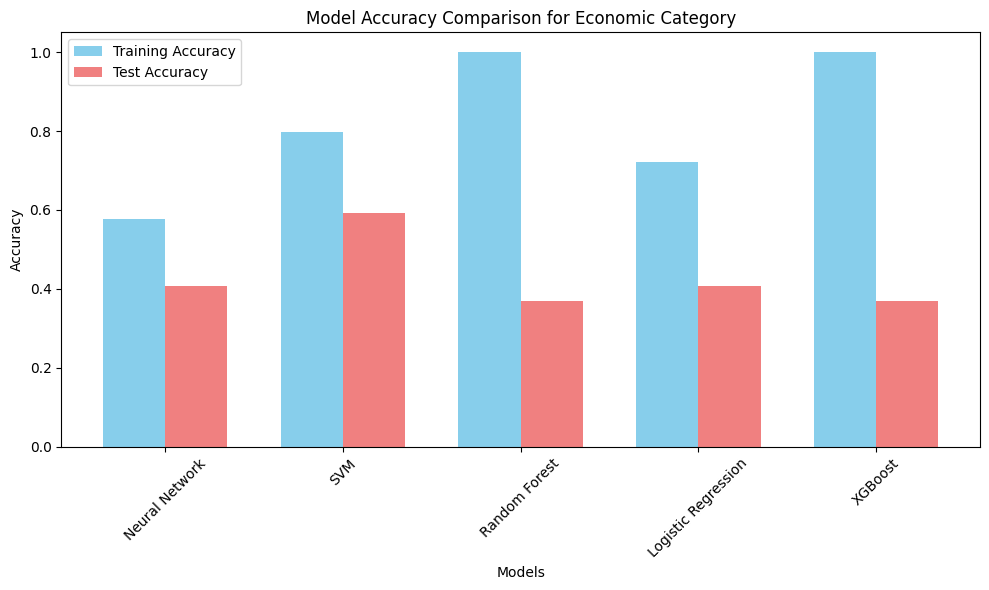

In [ ]:
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(models))

plt.bar(index, train_accuracies, bar_width, label='Training Accuracy', color='skyblue')
plt.bar(index + bar_width, test_accuracies, bar_width, label='Test Accuracy', color='lightcoral')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison for Economic Category')
plt.xticks(index + bar_width / 2, models, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# forecast 2026-2030
years = [2026, 2027, 2028, 2029, 2030]
predictions = []

countries = df['country_name'].tolist()

for year in years:
    # Adjust features for future years
    X_future = X.copy()
    X_future['population'] *= (1 + X_future['yearly_percentage_change'] / 100) ** (year - 2025)
    X_future['gdp'] *= (1 + 0.02) ** (year - 2025)
    X_future['trade_balance'] *= (1 + 0.01) ** (year - 2025)
    X_future['natural_resources'] *= (1 + 0.005) ** (year - 2025)

    # Preprocess future data
    X_future_imputed = imputer.transform(X_future)
    X_future_scaled = scaler.transform(X_future_imputed)

    # Predict with best model
    future_pred = xgb_classifier.predict(X_future_scaled) + 3
    # Store predictions
    for i, country in enumerate(countries):
        predictions.append({
            'country_name': country,
            'year': year,
            'predicted_economic_category': future_pred[i]
        })

# Save predictions to CSV
pred_df = pd.DataFrame(predictions)
pred_df.to_csv('economic_predictions_2026_2030.csv', index=False)
print("\nPredictions for 2026-2030 saved to 'economic_predictions_2026_2030.csv'")


Predictions for 2026-2030 saved to 'economic_predictions_2026_2030.csv'
